## Latihan 1: Manajemen Data Menggunakan ArcGIS Notebook


Notebook ini berisi beberapa contoh dasar penggunaan ArGIS Notebook untuk melakukan manajemen data spasial pada portal ArcGIS Online maupun ArcGIS Enterprise. Bahasan pada Notebook ini antara lain:

1. Melakukan Koneksi ke Geoportal
2. Mencari item pada portal dengan Query
3. Menampilkan hasil pencarian pada peta
4. Melakukan analisis sederhana dengan Pandas
5. Melakukan analisis spasial sederhana


### Membuat Koneksi ke Geoportal

Koneksi ke geoportal dilakukan dengan menggunakan modul `gis` pada ArcGIS API for Python. Koneksi ini diperlukan untuk dapat mengakses dan melakukan operasi pada portal Beberapa koneksi sekaligus dapat dibuat pada satu notebook yang sama, sehingga dapat digunakan untuk mengakses data dari sumber yang berbeda.

In [1]:
# Memanggil modul GIS dari arcgis for python
from arcgis.gis import GIS

Beberapa koneksi sekaligus dapat dibuat untuk mengakses data dari portal yang berbeda, seperti berikut:

In [2]:
# Koneksi sebagai pengguna Anonymous

gis = GIS()

In [3]:
# Koneksi sebagai pengguna yang saat ini login ke ArcGIS Online/Portal

gis1 = GIS("home")

In [31]:
# Koneksi sebagai pengguna portal lain, seperti SIGI PUPR

gis2 = GIS('https://sigi.pu.go.id/portalpupr/', 'Admin_BPII', 'Pusdatin2020')

Koneksi dapat dilakukan pada beberapa akun yang berbeda dengan menggunakan nama identifier yang unik untuk tiap koneksi

### Mencari Item pada Portal

Tiap koneksi dapat digunakan untuk mencari data pada portal yang terkait. Koneksi anonymous hanya dapat mengakses data yang memiliki hak akses `public`. Data pada portal yang terkunci memerlukan username dan password agar dapat diakses. Pencarian pada koneksi ini dapat dilakukan dengan menggunakan modul `content` pada `arcgis.gis`.

In [5]:
# Menampilkan bantuan untuk content search. tanda `?` dapat digunakan untuk menampilkan parameter apa saja yang digunakan pada sebuah function

gis.content.search?

Contoh pencarian layer dari Portal SIGI adalah sebagai berikut:

In [6]:
# menggunakan koneksi 2 (ke portal SIGI) untuk melakukan pencarian
# tanda wildcard (*) digunakan untuk mencari semua karakter
pencarianSIGI = gis2.content.search(query="title:Infrastruktur*", item_type="Feature *")

# Memanggil hasil pencarian untuk ditampilkan pada notebook
pencarianSIGI

[<Item title:"Infrastruktur PUPR" type:Feature Layer Collection owner:Sigiportal>,
 <Item title:"RI_RENCANA INFRASTRUKTUR" type:Feature Layer Collection owner:admin_BPIW>,
 <Item title:"Infrastruktur_Cipta_Karya" type:Feature Collection owner:Sigiportal>]

Menampilkan hasil pencarian dengan IPython. IPython dapat digunakan untuk berkomunikasi langsung dengan Jupyter Notebook, seperti menampilkan item dengan format tertentu

<Item title:"Infrastruktur PUPR" type:Feature Layer Collection owner:Sigiportal>
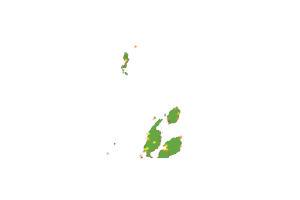

<Item title:"RI_RENCANA INFRASTRUKTUR" type:Feature Layer Collection owner:admin_BPIW>

<Item title:"Infrastruktur_Cipta_Karya" type:Feature Collection owner:Sigiportal>

In [7]:
# Memanggil modul display pada IPython untuk menampilkan daftar item hasil pencarian
from IPython.display import display
for item in pencarianSIGI:
    display(item)

Hasil pencarian dapat disimpan pada kernel aktif menjadi layer baru. Index pertama `[0]` digunakan untuk mengakses hasil pencarian pertama. 

<Item title:"Infrastruktur PUPR" type:Feature Layer Collection owner:Sigiportal>
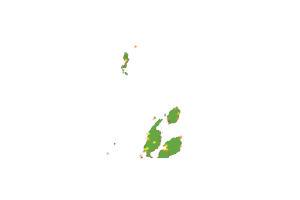

In [8]:
# memanggil item hasil pencarian pertama (index ke-[0])
LayerCiptaKarya = pencarianSIGI[0]

# menampilkan item hasil pencarian
LayerCiptaKarya

Beberapa fungsi Python dapat digunakan untuk mengoptimalkan pencarian. Apabila judul item yang akan dibuka telah diketahui, maka query dapat dibuat untuk langsung memanggil item tersebut:


`pencarianSIGI = gis2.content.search(query="title:Infrastruktur_Cipta_Karya")`


Cara lain adalah dengan menggunakan Python untuk melakukan iterasi pada item dan mencari properti yang sesuai

In [9]:
# Mencari dengan menggunakan fungsi Python
layerTerpilih = [temp_item for temp_item in pencarianSIGI if temp_item.title == "Infrastruktur_Cipta_Karya"]

# Menampilkan item hasil pencarian sebagai variabel layerTerpilih
layerTerpilih

[<Item title:"Infrastruktur_Cipta_Karya" type:Feature Collection owner:Sigiportal>]

### Menampilkan Hasil Pencarian pada peta

Hasil pencarian dari portal merupakan sebuah 'item' yang tidak dapat langsung diolah sebagai sebuah layer. Item mewakili layer berikut metadata dan keterangan pendukung lainnya. Contoh berikut menunjukkan bagaimana hasil pencarian dari portal dapat dipanggil dalam bentuk layer yang bisa ditampilkan pada peta

In [10]:
# Menggunakan koneksi GIS-1 untuk membuat peta
peta1 = gis1.map()

# Menampilkan peta
peta1

MapView(layout=Layout(height='400px', width='100%'))

Layer dari item terpilih dapat dipanggil menggunakan index nol [0]. Hasil layer ini dapat disimpan pada memory dan ditambahkan ke dalam peta yang sudah dibuat sebelumnya.

In [12]:
# Menambahkan layer 
peta1.add_layer(layerTerpilih[0])
peta1.zoom_to_layer(layerTerpilih[0])

Modul `maps` memiliki beberapa properti yang berguna untuk mengatur tampilan peta. Diantaranya adalah basemap, zoom level, dan seterusnya.

In [14]:
peta1.basemap = 'dark-gray-vector'

### Mengolah Data dari Portal dengan Pandas/Spatially Enabled Dataframe

Bagian ini mendemokan bagaimana data yang dipanggil dari portal dapat diolah dengan menggunakan Pandas sebagai dataframe. ArcGIS Notebook menggunakan Spatially Enabled Data Frame (SEDF) untuk mengolah data spasial dengan Pandas. Contoh berikut menggunakan SDEF untuk melakukan slicing data.

In [19]:
# Memanggil Pandas
import pandas as pd

In [ ]:
# Menambahkan layer dari portal dengan ID
# Title: candi_feature | Type: Feature Service | Owner: Dany_Laksono_LearnArcGIS7
candi = gis2.content.get("77140b3593ac4381b6a05abb5b80f502")
candi

Dari hasil pemanggilan item, kemudian dilakukan ekstraksi layer dengan memanggil indeks nol [0]

In [17]:
# mendefinisikan feature layer dari item yang dipanggil
fl = candi.layers[0]

# menampilkan hasil ekstraksi layer
fl

<FeatureLayer url:"https://services3.arcgis.com/U26uBjSD32d7xvm2/arcgis/rest/services/candi_feature/FeatureServer/0">

Spatially Enabled Data Frame (SDEF) memiliki berbagai fungsi untuk mengkonversi data spasial dari dan ke format dataframe yang digunakan oleh Pandas.

In [20]:
# Mengkonversi feature layer menjadi spatial data frame menggunakan fungsi from_layer()
sdf = pd.DataFrame.spatial.from_layer(fl)

# Menampilkan 5 data teratas
sdf.head(5)

,id,tipe,geom_wkt_type,geom_wkt_coordinates_0,geom_wkt_coordinates_1,geom,nama,jenis,desa,kecamatan,kabupaten,provinsi,x,y,deskripsi,latarsejarah,luasbangunan,luaslahan,ObjectId,SHAPE
0,1255,POINT,Point,110.832300,-6.804000,0101000020E61000007E1D386744B55B409DEFA7C64B37...,Komplek Peninggalan Sunan Kudus,"Masjid, Makam, Menara",Kauman,Kudus Kota,Kudus,Jawa Tengah,-6.804047,110.832304,None,None,859.42,"21886,5 m2",1,"{""x"": 12337795.644725297, ""y"": -759209.5815613..."
1,1256,POINT,Point,110.637200,-6.894400,0101000020E6100000B84082E2C7A85B405A2BF697DD93...,Masjid Agung Demak,Masjid,Bintoro/Kauman,Demak,Demak,Jawa Tengah,-6.894444,110.637222,None,None,533.10,15000 m2,2,"{""x"": 12316079.215822363, ""y"": -769344.8623569..."
2,1257,POINT,Point,110.203771,-7.607712,0101000020E6100000E33785950A8D5B40098CF50D4C6E...,Taman Wisata Candi Borobudur,Candi,None,None,None,None,-7.607712,110.203771,None,None,NaN,10191000,3,"{""x"": 12267827.67121853, ""y"": -849386.14638993..."
3,1258,POINT,Point,110.492009,-7.751922,0101000020E61000009C1551137D9F5B4058923CD7F701...,Taman Wisata Candi Prambanan,Candi,None,None,None,None,-7.751922,110.492009,None,None,NaN,7400000,4,"{""x"": 12299914.1786058, ""y"": -865584.831306829..."
4,1259,POINT,Point,110.834488,-7.455752,0101000020E6100000E2395B4068B55B40AC58FCA6B0D2...,Daerah Sangiran,Cagar Budaya,None,None,Sragen dan Karanganyar,Jawa Tengah,-7.455752,110.834488,None,None,NaN,None,5,"{""x"": 12338038.76649319, ""y"": -832322.81619620..."


Query sederhana dalam bahasa SQL dapat dibuat pada feature layer yang telah terbentuk

In [21]:
# Melakukan Query untuk mencari hanya candi yang terletak di Jawa Tengah saja
df = fl.query(where="provinsi = 'Jawa Tengah'").sdf

df.head(5)

,id,tipe,geom_wkt_type,geom_wkt_coordinates_0,geom_wkt_coordinates_1,geom,nama,jenis,desa,kecamatan,kabupaten,provinsi,x,y,deskripsi,latarsejarah,luasbangunan,luaslahan,ObjectId,SHAPE
0,1255,POINT,Point,110.832300,-6.804000,0101000020E61000007E1D386744B55B409DEFA7C64B37...,Komplek Peninggalan Sunan Kudus,"Masjid, Makam, Menara",Kauman,Kudus Kota,Kudus,Jawa Tengah,-6.804047,110.832304,None,None,859.42,"21886,5 m2",1,"{""x"": 12337795.644725297, ""y"": -759209.5815613..."
1,1256,POINT,Point,110.637200,-6.894400,0101000020E6100000B84082E2C7A85B405A2BF697DD93...,Masjid Agung Demak,Masjid,Bintoro/Kauman,Demak,Demak,Jawa Tengah,-6.894444,110.637222,None,None,533.10,15000 m2,2,"{""x"": 12316079.215822363, ""y"": -769344.8623569..."
2,1259,POINT,Point,110.834488,-7.455752,0101000020E6100000E2395B4068B55B40AC58FCA6B0D2...,Daerah Sangiran,Cagar Budaya,None,None,Sragen dan Karanganyar,Jawa Tengah,-7.455752,110.834488,None,None,NaN,None,5,"{""x"": 12338038.76649319, ""y"": -832322.81619620..."
3,1260,POINT,Point,110.203734,-7.607920,0101000020E610000054C554FA098D5B4058569A94826E...,Candi Borobudur,Candi,Borobudur,Borobudur,Magelang,Jawa Tengah,-7.607920,110.203734,Candi Borobudur yang dikenal sebagai bangunan ...,Candi Borobudur yang dikenal sebagai peninggal...,NaN,None,6,"{""x"": 12267823.552397368, ""y"": -849409.5064713..."
4,1261,POINT,Point,110.203734,-7.607920,0101000020E610000054C554FA098D5B4058569A94826E...,Candi Borobudur,Candi,Bumisegoro,Muntilan,Magelang,Jawa Tengah,-7.607920,110.203734,None,None,12769.00,85000,7,"{""x"": 12267823.552397368, ""y"": -849409.5064713..."


Hasil seleksi dapat disimpan sebagai layer baru pada kernel untuk dilakukan proses selanjutnya

In [49]:
# Menyimpan hasil seleksi query ke dalam layer 'selected'
layer = df.spatial.to_featurelayer("candi_terpilih")

# menampilkan item layer
layer

<Item title:"candi_terpilih" type:Feature Layer Collection owner:Admin_BPII>

Layer yang sudah terbentuk dapat ditambahkan ke dalam peta

In [40]:
# Membuat peta baru dan mengatur tampilannya menggunakan koneksi GIS-1
peta_candi = gis2.map()

peta_candi

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
# Menambahkan layer
peta_candi.add_layer(layer)
peta_candi.zoom_to_layer(layer)

### Melakukan Analisis Spasial

Modul ArcGIS API for Python mengandung fungsi untuk analisis geoprocessing baik raster maupun features. Modul-modul ini dapat digunakan untuk melakukan analisis spasial terhadap data yang diperoleh dari server. Pada ArcGIS Desktop, modul-modul ini juga dapat dikombinasikan dengan fungsi-fungsi yang disediakan oleh ArcPy.

In [54]:
# Memanggil fungsi analisis feature dari modul ArcGIS
from arcgis import features

<Item title:"Titik Intranet Diskominfotik Pemprov DKI Jakarta" type:Feature Layer Collection owner:adminjakartagis>
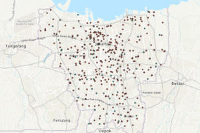

In [57]:
# Menambahkan Layer dari ArcGIS Public
# Title: Titik Intranet Diskominfotik Pemprov DKI Jakarta | Type: Feature Service | Owner: adminjakartagis
titik_intranet = gis1.content.get("395495bd1b2a484da06202eee5e92bbf")
titik_intranet

Analisis spasial dilakukan dengan memanggil method yang sesuai dari modul features atau raster. Contoh berikut melakukan analisis densitas pada data yang dipanggil dari server publik ArcGIS

In [58]:
# melakukan analisis densitas
analisis_density = features.analyze_patterns.calculate_density(titik_intranet)

Hasil analisis, sebagaimana layer lain, dapat ditambahkan pada peta

In [59]:
peta_kepadatan = gis1.map("Jakarta")

peta_kepadatan

MapView(layout=Layout(height='400px', width='100%'))

In [60]:
peta_kepadatan.add_layer(titik_intranet)
peta_kepadatan.add_layer(analisis_density)

Contoh lain penggunaan analisis adalah sebagai berikut: pada tiap layer dilakukan buffer sejauh 500 meter

In [66]:
buff = features.use_proximity.create_buffers(titik_intranet, distances=[5000], units='Meters')


In [67]:
buff

<FeatureCollection>

Terakhir, data hasil analisis juga bisa ditambahkan ke dalam peta

In [68]:
peta_kepadatan.add_layer(buff)